In [53]:
import numpy as np
import pandas as pd
import pickle
import re
import nltk
import nltk.corpus
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.snowball import SnowballStemmer
plt.rcParams["figure.figsize"] = [10, 8]

# Biology Tags

In [1]:
bio = pd.read_csv("data/biology.csv")

In [5]:
tag_list = [tags.split(' ') for tags in bio['tags']]

In [6]:
tag_list

[['ribosome', 'binding-sites', 'translation', 'synthetic-biology'],
 ['rna', 'biochemistry'],
 ['immunology', 'cell-biology', 'hematology'],
 ['cell-culture'],
 ['splicing', 'mrna', 'spliceosome', 'introns', 'exons'],
 ['dna', 'biochemistry', 'molecular-biology'],
 ['neuroscience', 'synapses'],
 ['plasmids'],
 ['molecular-genetics', 'gene-expression', 'experimental-design'],
 ['evolution', 'mitochondria', 'chloroplasts'],
 ['high-throughput', 'cell-based'],
 ['molecular-biology', 'synthetic-biology'],
 ['bioinformatics', 'homework'],
 ['neuroscience', 'immunology'],
 ['splicing', 'histone'],
 ['genomics', 'gene-annotation', 'exons'],
 ['microbiology', 'virology', 'influenza'],
 ['epigenetics'],
 ['molecular-biology', 'dna-isolation'],
 ['cell-membrane', 'adaptation', 'cell-biology'],
 ['transcription', 'chromatin'],
 ['biochemistry', 'neuroscience'],
 ['molecular-biology', 'transcription', 'rna-interference'],
 ['neuroscience', 'endocrinology', 'human-biology'],
 ['bioinformatics', 'ph

In [7]:
flat_list = [item for sublist in tag_list for item in sublist]

In [8]:
flat_list

['ribosome',
 'binding-sites',
 'translation',
 'synthetic-biology',
 'rna',
 'biochemistry',
 'immunology',
 'cell-biology',
 'hematology',
 'cell-culture',
 'splicing',
 'mrna',
 'spliceosome',
 'introns',
 'exons',
 'dna',
 'biochemistry',
 'molecular-biology',
 'neuroscience',
 'synapses',
 'plasmids',
 'molecular-genetics',
 'gene-expression',
 'experimental-design',
 'evolution',
 'mitochondria',
 'chloroplasts',
 'high-throughput',
 'cell-based',
 'molecular-biology',
 'synthetic-biology',
 'bioinformatics',
 'homework',
 'neuroscience',
 'immunology',
 'splicing',
 'histone',
 'genomics',
 'gene-annotation',
 'exons',
 'microbiology',
 'virology',
 'influenza',
 'epigenetics',
 'molecular-biology',
 'dna-isolation',
 'cell-membrane',
 'adaptation',
 'cell-biology',
 'transcription',
 'chromatin',
 'biochemistry',
 'neuroscience',
 'molecular-biology',
 'transcription',
 'rna-interference',
 'neuroscience',
 'endocrinology',
 'human-biology',
 'bioinformatics',
 'phylogenetics',

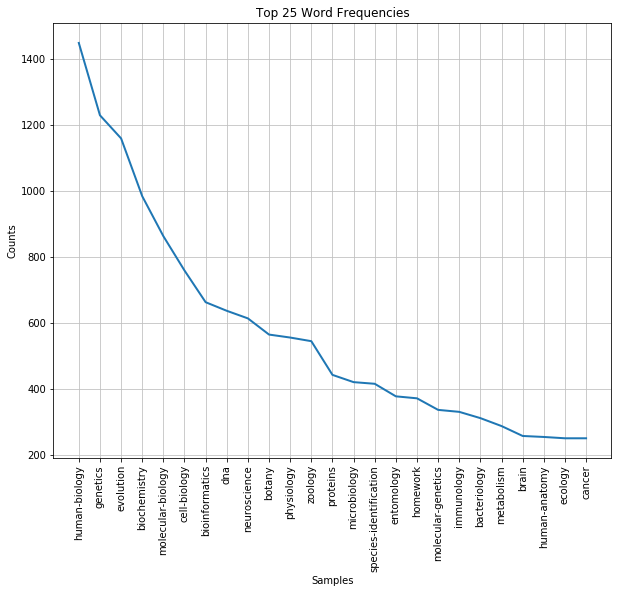

In [16]:
fq = nltk.FreqDist(w for w in flat_list)
fq.plot(25, title = "Top 25 Tags")

In [40]:
dist = [freqdist for freqdist in fq]

In [41]:
dist

['ribosome',
 'binding-sites',
 'translation',
 'synthetic-biology',
 'rna',
 'biochemistry',
 'immunology',
 'cell-biology',
 'hematology',
 'cell-culture',
 'splicing',
 'mrna',
 'spliceosome',
 'introns',
 'exons',
 'dna',
 'molecular-biology',
 'neuroscience',
 'synapses',
 'plasmids',
 'molecular-genetics',
 'gene-expression',
 'experimental-design',
 'evolution',
 'mitochondria',
 'chloroplasts',
 'high-throughput',
 'cell-based',
 'bioinformatics',
 'homework',
 'histone',
 'genomics',
 'gene-annotation',
 'microbiology',
 'virology',
 'influenza',
 'epigenetics',
 'dna-isolation',
 'cell-membrane',
 'adaptation',
 'transcription',
 'chromatin',
 'rna-interference',
 'endocrinology',
 'human-biology',
 'phylogenetics',
 'genetics',
 'astrobiology',
 'primer',
 'history',
 'bacteriology',
 'mycology',
 'enzymes',
 'human-anatomy',
 'histology',
 'staining',
 'zoology',
 'radiation',
 'entomology',
 'abiogenesis',
 'green-fluorescent-protein',
 'cloning',
 'anatomy',
 'hearing',
 

In [13]:
len(flat_list)

33129

In [14]:
len(set(flat_list))

678

# Cooking Tags

In [3]:
cooking = pd.read_csv("data/cooking.csv")

In [4]:
tag_list = [tags.split(' ') for tags in cooking['tags']]

In [5]:
tag_list

[['baking', 'cookies', 'texture'],
 ['oven', 'cooking-time', 'bacon'],
 ['eggs'],
 ['substitutions', 'please-remove-this-tag', 'baking-soda', 'baking-powder'],
 ['sauce', 'pasta', 'tomatoes', 'italian-cuisine'],
 ['substitutions', 'herbs', 'parsley'],
 ['food-safety', 'beef', 'cooking-time'],
 ['eggs', 'basics', 'poaching'],
 ['ice-cream'],
 ['baking', 'chicken', 'cooking-time'],
 ['grilling', 'salmon', 'cedar-plank'],
 ['baking', 'flour', 'measurements', 'sifting'],
 ['storage-method', 'storage-lifetime', 'fats'],
 ['canning', 'pressure-canner', 'food-preservation'],
 ['spices', 'resources', 'basics', 'learning'],
 ['food-safety', 'storage-method', 'storage-lifetime', 'butter'],
 ['baking', 'bread', 'dough'],
 ['rice', 'italian-cuisine', 'risotto'],
 ['eggs', 'food-science', 'vinegar', 'poaching'],
 ['storage-method', 'bread'],
 ['knife-skills', 'resources', 'learning', 'cutting'],
 ['nutrient-composition', 'calories'],
 ['storage-method', 'spices', 'organization', 'pantry'],
 ['stora

In [6]:
flat_list = [item for sublist in tag_list for item in sublist]

In [7]:
flat_list

['baking',
 'cookies',
 'texture',
 'oven',
 'cooking-time',
 'bacon',
 'eggs',
 'substitutions',
 'please-remove-this-tag',
 'baking-soda',
 'baking-powder',
 'sauce',
 'pasta',
 'tomatoes',
 'italian-cuisine',
 'substitutions',
 'herbs',
 'parsley',
 'food-safety',
 'beef',
 'cooking-time',
 'eggs',
 'basics',
 'poaching',
 'ice-cream',
 'baking',
 'chicken',
 'cooking-time',
 'grilling',
 'salmon',
 'cedar-plank',
 'baking',
 'flour',
 'measurements',
 'sifting',
 'storage-method',
 'storage-lifetime',
 'fats',
 'canning',
 'pressure-canner',
 'food-preservation',
 'spices',
 'resources',
 'basics',
 'learning',
 'food-safety',
 'storage-method',
 'storage-lifetime',
 'butter',
 'baking',
 'bread',
 'dough',
 'rice',
 'italian-cuisine',
 'risotto',
 'eggs',
 'food-science',
 'vinegar',
 'poaching',
 'storage-method',
 'bread',
 'knife-skills',
 'resources',
 'learning',
 'cutting',
 'nutrient-composition',
 'calories',
 'storage-method',
 'spices',
 'organization',
 'pantry',
 'stor

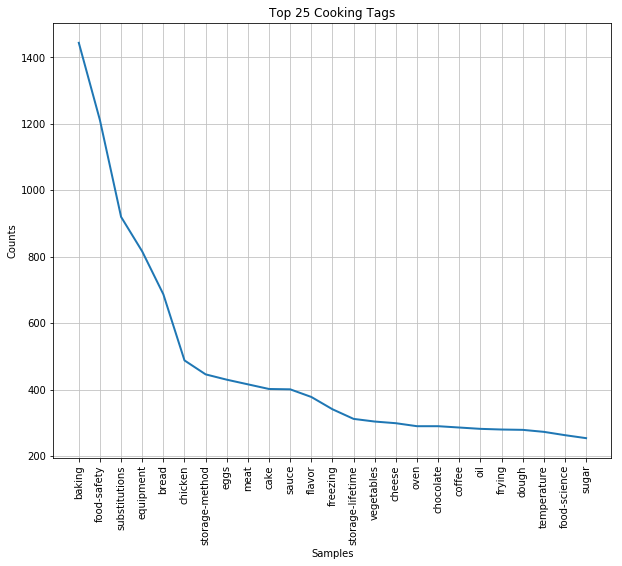

In [10]:
fq = nltk.FreqDist(w for w in flat_list)
fq.plot(25, title = "Top 25 Cooking Tags")

In [11]:
len(flat_list)

35542

In [12]:
len(set(flat_list))

736

# Crypto Tags

In [13]:
crypto = pd.read_csv("data/crypto.csv")

In [14]:
tag_list = [tags.split(' ') for tags in crypto['tags']]

In [15]:
tag_list

[['block-cipher', 'des', 'permutation'],
 ['oblivious-transfer', 'multiparty-computation', 'function-evaluation'],
 ['sha-1', 'hash'],
 ['hash', 'cryptanalysis', 'preimage-resistance'],
 ['encryption', 'rsa', 'public-key'],
 ['des', 'encryption', 's-boxes'],
 ['dsa', 'bitcoin', 'digital-cash', 'ripemd'],
 ['hash', 'implementation', 'salt'],
 ['encryption', 'aes', 'block-cipher', 'key-size'],
 ['hash', 'passwords'],
 ['cryptanalysis', 'block-cipher', 'differential-analysis'],
 ['coding-theory', 'elliptic-curves', 'hermitian-curves'],
 ['encryption', 'tls', 'public-key', 'keys'],
 ['hash', 'salt', 'randomness'],
 ['cryptanalysis', 'classical-cipher', 'substitution-cipher', 'playfair'],
 ['encryption', 'salt', 'database'],
 ['xor', 'stream-cipher'],
 ['encryption', 'hash', 'block-cipher', 'stream-cipher'],
 ['implementation', 'aes', 'side-channel-attack', 'timing-attack'],
 ['cryptanalysis', 'one-time-pad', 'key-reuse'],
 ['encryption', 'des', 'modes-of-operation', 'cbc'],
 ['public-key',

In [16]:
flat_list = [item for sublist in tag_list for item in sublist]

In [17]:
flat_list

['block-cipher',
 'des',
 'permutation',
 'oblivious-transfer',
 'multiparty-computation',
 'function-evaluation',
 'sha-1',
 'hash',
 'hash',
 'cryptanalysis',
 'preimage-resistance',
 'encryption',
 'rsa',
 'public-key',
 'des',
 'encryption',
 's-boxes',
 'dsa',
 'bitcoin',
 'digital-cash',
 'ripemd',
 'hash',
 'implementation',
 'salt',
 'encryption',
 'aes',
 'block-cipher',
 'key-size',
 'hash',
 'passwords',
 'cryptanalysis',
 'block-cipher',
 'differential-analysis',
 'coding-theory',
 'elliptic-curves',
 'hermitian-curves',
 'encryption',
 'tls',
 'public-key',
 'keys',
 'hash',
 'salt',
 'randomness',
 'cryptanalysis',
 'classical-cipher',
 'substitution-cipher',
 'playfair',
 'encryption',
 'salt',
 'database',
 'xor',
 'stream-cipher',
 'encryption',
 'hash',
 'block-cipher',
 'stream-cipher',
 'implementation',
 'aes',
 'side-channel-attack',
 'timing-attack',
 'cryptanalysis',
 'one-time-pad',
 'key-reuse',
 'encryption',
 'des',
 'modes-of-operation',
 'cbc',
 'public-ke

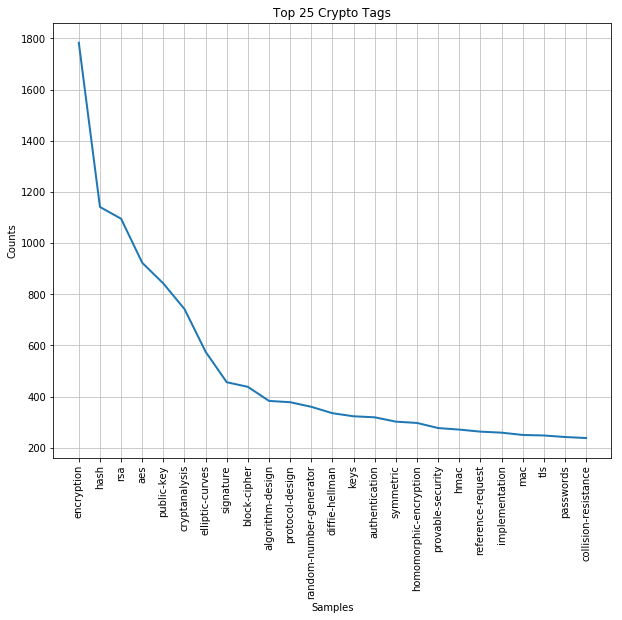

In [18]:
fq = nltk.FreqDist(w for w in flat_list)
fq.plot(25, title = "Top 25 Crypto Tags")

In [19]:
len(flat_list)

25484

In [20]:
len(set(flat_list))

392

# DIY Tags

In [23]:
diy = pd.read_csv("data/diy.csv")

In [24]:
tag_list = [tags.split(' ') for tags in diy['tags']]

In [25]:
tag_list

[['remodeling', 'basement', 'carpentry'],
 ['caulking', 'bathroom'],
 ['drywall'],
 ['walls', 'load-bearing', 'structural'],
 ['repair', 'electrical'],
 ['crack', 'stucco'],
 ['fan'],
 ['radiator'],
 ['drywall', 'wallpaper'],
 ['windows'],
 ['vinyl-siding'],
 ['concrete'],
 ['repair', 'radiator', 'pipe'],
 ['electrical', 'fire-hazard', 'knob-and-tube'],
 ['drywall', 'walls', 'framing', 'studs'],
 ['paint', 'floor', 'garage'],
 ['tools'],
 ['paint', 'bathroom'],
 ['tile', 'grout'],
 ['plumbing', 'sealing', 'toilet'],
 ['asphalt', 'driveway'],
 ['caulking', 'technique'],
 ['paint', 'ceiling', 'leak'],
 ['lighting', 'pole'],
 ['draft', 'baseboard', 'sealing'],
 ['repair', 'roof', 'pvc', 'treehouse'],
 ['tools'],
 ['lawn'],
 ['water-heater', 'energy-efficiency'],
 ['concrete', 'technique'],
 ['bathroom', 'sound-proofing'],
 ['basement', 'floor', 'basement-refinishing', 'carpet'],
 ['sink', 'rust-removal'],
 ['pocket-door'],
 ['bathroom', 'bathtub'],
 ['insulation', 'attic'],
 ['electrical'

In [26]:
flat_list = [item for sublist in tag_list for item in sublist]

In [27]:
flat_list

['remodeling',
 'basement',
 'carpentry',
 'caulking',
 'bathroom',
 'drywall',
 'walls',
 'load-bearing',
 'structural',
 'repair',
 'electrical',
 'crack',
 'stucco',
 'fan',
 'radiator',
 'drywall',
 'wallpaper',
 'windows',
 'vinyl-siding',
 'concrete',
 'repair',
 'radiator',
 'pipe',
 'electrical',
 'fire-hazard',
 'knob-and-tube',
 'drywall',
 'walls',
 'framing',
 'studs',
 'paint',
 'floor',
 'garage',
 'tools',
 'paint',
 'bathroom',
 'tile',
 'grout',
 'plumbing',
 'sealing',
 'toilet',
 'asphalt',
 'driveway',
 'caulking',
 'technique',
 'paint',
 'ceiling',
 'leak',
 'lighting',
 'pole',
 'draft',
 'baseboard',
 'sealing',
 'repair',
 'roof',
 'pvc',
 'treehouse',
 'tools',
 'lawn',
 'water-heater',
 'energy-efficiency',
 'concrete',
 'technique',
 'bathroom',
 'sound-proofing',
 'basement',
 'floor',
 'basement-refinishing',
 'carpet',
 'sink',
 'rust-removal',
 'pocket-door',
 'bathroom',
 'bathtub',
 'insulation',
 'attic',
 'electrical',
 'safety',
 'afci',
 'floor',
 

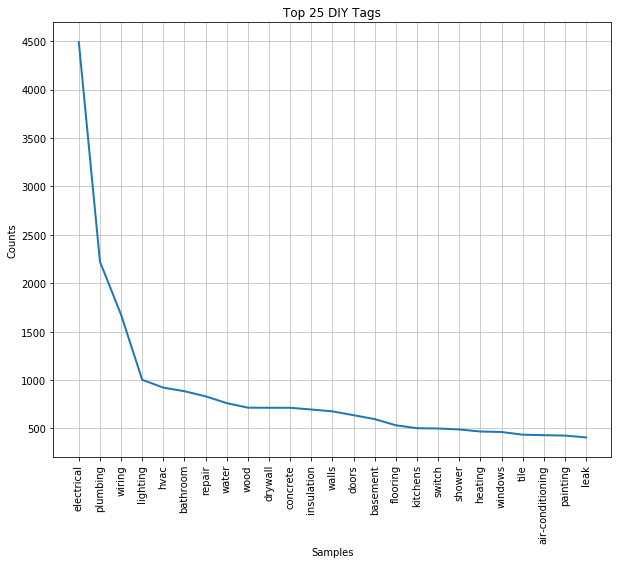

In [28]:
fq = nltk.FreqDist(w for w in flat_list)
fq.plot(25, title = "Top 25 DIY Tags")

In [29]:
len(flat_list)

59129

In [30]:
len(set(flat_list))

734

# Robotics Tags

In [31]:
robotics = pd.read_csv("data/robotics.csv")

In [33]:
tag_list = [tags.split(' ') for tags in robotics['tags']]

In [34]:
tag_list

[['soccer', 'control'],
 ['control', 'rcservo'],
 ['gait', 'walk'],
 ['microcontroller', 'arduino', 'raspberry-pi'],
 ['motion-planning', 'rrt'],
 ['software', 'platform'],
 ['software', 'circuit'],
 ['odometry', 'localization', 'kalman-filter'],
 ['untagged'],
 ['soccer', 'mechanism'],
 ['computer-vision', 'wheeled-robot'],
 ['quadcopter'],
 ['servos'],
 ['localization', 'mobile-robot'],
 ['kinect', 'input'],
 ['wheel'],
 ['control', 'gyroscope', 'balance', 'two-wheeled'],
 ['design', 'underwater', 'auv'],
 ['underwater', 'battery', 'auv'],
 ['electronics', 'protection'],
 ['localization', 'gps'],
 ['slam', 'localization', 'gps', 'mapping', 'acoustic-rangefinder'],
 ['servos', 'heat-management', 'cooling'],
 ['sensors', 'failure', 'motor'],
 ['two-wheeled', 'stability'],
 ['mobile-robot', 'design', 'movement', 'wheel', 'first-robotics'],
 ['arduino', 'logic-control', 'stepper-motor', 'stepper-driver'],
 ['mobile-robot'],
 ['servos', 'mobile-robot', 'stepper-motor'],
 ['motor', 'actuat

In [35]:
flat_list = [item for sublist in tag_list for item in sublist]

In [36]:
flat_list

['soccer',
 'control',
 'control',
 'rcservo',
 'gait',
 'walk',
 'microcontroller',
 'arduino',
 'raspberry-pi',
 'motion-planning',
 'rrt',
 'software',
 'platform',
 'software',
 'circuit',
 'odometry',
 'localization',
 'kalman-filter',
 'untagged',
 'soccer',
 'mechanism',
 'computer-vision',
 'wheeled-robot',
 'quadcopter',
 'servos',
 'localization',
 'mobile-robot',
 'kinect',
 'input',
 'wheel',
 'control',
 'gyroscope',
 'balance',
 'two-wheeled',
 'design',
 'underwater',
 'auv',
 'underwater',
 'battery',
 'auv',
 'electronics',
 'protection',
 'localization',
 'gps',
 'slam',
 'localization',
 'gps',
 'mapping',
 'acoustic-rangefinder',
 'servos',
 'heat-management',
 'cooling',
 'sensors',
 'failure',
 'motor',
 'two-wheeled',
 'stability',
 'mobile-robot',
 'design',
 'movement',
 'wheel',
 'first-robotics',
 'arduino',
 'logic-control',
 'stepper-motor',
 'stepper-driver',
 'mobile-robot',
 'servos',
 'mobile-robot',
 'stepper-motor',
 'motor',
 'actuator',
 'noise',
 '

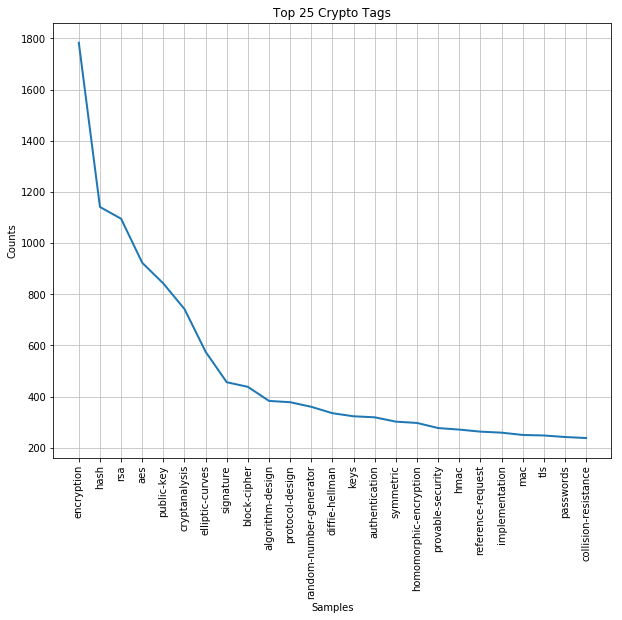

In [18]:
fq = nltk.FreqDist(w for w in flat_list)
fq.plot(25, title = "Top 25 Crypto Tags")

In [37]:
len(flat_list)

6520

In [38]:
len(set(flat_list))

231

# Travel Tags

In [54]:
travel = pd.read_csv("data/travel.csv")

In [55]:
tag_list = [tags.split(' ') for tags in travel['tags']]

In [56]:
tag_list

[['caribbean', 'cruising', 'vacations'],
 ['guides', 'extreme-tourism', 'amazon-river', 'amazon-jungle'],
 ['loyalty-programs', 'routes', 'ewr', 'singapore-airlines', 'sin'],
 ['romania', 'transportation'],
 ['extreme-tourism', 'antarctica'],
 ['usa', 'airport-transfer', 'taxis', 'seattle'],
 ['sightseeing', 'public-transport', 'transportation', 'argentina'],
 ['safety', 'international-travel', 'money', 'exchange'],
 ['russia', 'visas', 'china', 'mongolia', 'trans-siberian'],
 ['online-resources', 'transportation', 'peru', 'south-america', 'bolivia'],
 ['us-citizens', 'travel-agents', 'cuba'],
 ['sightseeing', 'hungary', 'budapest'],
 ['europe', 'online-resources', 'planning', 'guides', 'trains'],
 ['budget', 'cellphones', 'data-plans', 'communication', 'mobile-operators'],
 ['air-travel', 'around-the-world'],
 ['sightseeing', 'planning', 'tourist-traps'],
 ['budget', 'europe', 'cellphones', 'mobile-operators'],
 ['air-travel', 'usa', 'sightseeing', 'tours'],
 ['online-resources',
  'i

In [57]:
flat_list = [item for sublist in tag_list for item in sublist]

In [58]:
flat_list

['caribbean',
 'cruising',
 'vacations',
 'guides',
 'extreme-tourism',
 'amazon-river',
 'amazon-jungle',
 'loyalty-programs',
 'routes',
 'ewr',
 'singapore-airlines',
 'sin',
 'romania',
 'transportation',
 'extreme-tourism',
 'antarctica',
 'usa',
 'airport-transfer',
 'taxis',
 'seattle',
 'sightseeing',
 'public-transport',
 'transportation',
 'argentina',
 'safety',
 'international-travel',
 'money',
 'exchange',
 'russia',
 'visas',
 'china',
 'mongolia',
 'trans-siberian',
 'online-resources',
 'transportation',
 'peru',
 'south-america',
 'bolivia',
 'us-citizens',
 'travel-agents',
 'cuba',
 'sightseeing',
 'hungary',
 'budapest',
 'europe',
 'online-resources',
 'planning',
 'guides',
 'trains',
 'budget',
 'cellphones',
 'data-plans',
 'communication',
 'mobile-operators',
 'air-travel',
 'around-the-world',
 'sightseeing',
 'planning',
 'tourist-traps',
 'budget',
 'europe',
 'cellphones',
 'mobile-operators',
 'air-travel',
 'usa',
 'sightseeing',
 'tours',
 'online-reso

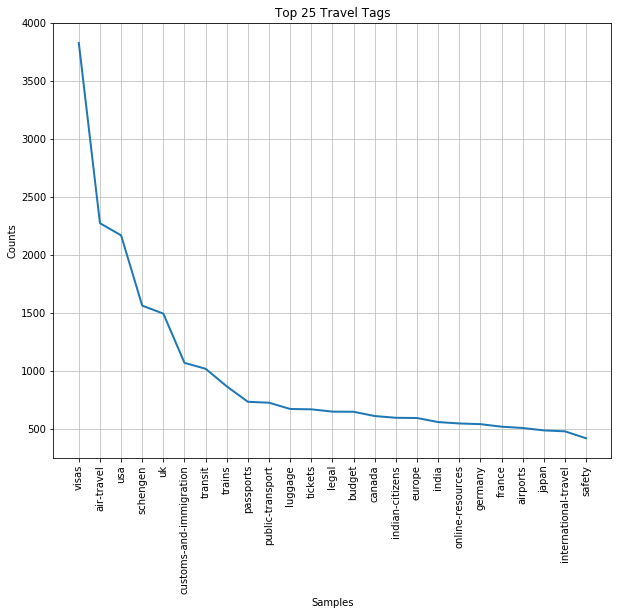

In [59]:
fq = nltk.FreqDist(w for w in flat_list)
fq.plot(25, title = "Top 25 Travel Tags")

In [60]:
len(flat_list)

65334

In [61]:
len(set(flat_list))

1645

In [100]:
df = pd.DataFrame.from_dict(fq, orient="index").reset_index()
df_95 = df[df.iloc[:,1] >= np.percentile(df.iloc[:,1],95)].reset_index(drop=True)

In [101]:
df_95

,index,0
0,loyalty-programs,171
1,transportation,331
2,usa,2168
3,airport-transfer,367
4,sightseeing,224
5,public-transport,723
6,safety,416
7,international-travel,476
8,money,392
9,exchange,148
